In [8]:
import geopandas as gps
import pandas as pd

google_data = pd.concat([pd.DataFrame(i, index=[0])
           for i in
           pd.read_json("geodata/dailies.json")['searches']],
          ignore_index=True)

regions = pd.DataFrame({"region": ["Burgenland",
                                   "Kärnten",
                                   "Niederösterreich",
                                   "Oberösterreich",
                                   "Salzburg",
                                   "Steiermark",
                                   "Tirol",
                                   "Vorarlberg",
                                   "Wien",
                                   ],
                        "region_id": [1,
                                      2,
                                      3,
                                      4,
                                      5,
                                      6,
                                      7,
                                      8,
                                      9
                                   ]})


google_data.date = pd.to_datetime(google_data.date,format="%Y-%m-%d")
google_data = google_data.merge(regions,left_on="region_id",right_on="region_id")

google_data.head(3)

,title,count,date,place,region_id,region
0,2017,100,2016-12-31,0,6,Steiermark
1,2018,100,2017-12-31,0,6,Steiermark
2,2019,98,2018-12-31,1,6,Steiermark


In [9]:
gdf = gps.GeoDataFrame.from_file("geodata/VGD_Österreich_gen_250.shp")
gdf.head(3)

,ST_KZ,FL,MERIDIAN,GKZ,BKZ,FA_NR,BL_KZ,KG_NR,KG,PG,PB,FA,GB_KZ,GB,VA_NR,VA,BL,ST,geometry
0,1,25559609,31,20804,208,57.0,2.0,76222,Trögern,Eisenkappel-Vellach,Völkermarkt,Klagenfurt,762,Eisenkappel,76,Völkermarkt,Kärnten,Österreich,"POLYGON ((488292.183 285050.700, 488846.056 28..."
1,1,22226607,31,20804,208,57.0,2.0,76218,Remschenig,Eisenkappel-Vellach,Völkermarkt,Klagenfurt,762,Eisenkappel,76,Völkermarkt,Kärnten,Österreich,"POLYGON ((497147.603 287018.028, 497719.621 28..."
2,1,38553914,31,20804,208,57.0,2.0,76203,Bad Vellach,Eisenkappel-Vellach,Völkermarkt,Klagenfurt,762,Eisenkappel,76,Völkermarkt,Kärnten,Österreich,"POLYGON ((496371.181 287773.327, 496480.337 28..."


In [64]:
data = google_data

title        22
count        22
date         22
place        22
region_id    22
region       22
dtype: int64

In [67]:
grouped = data.groupby(["region","title"]).sum().nlargest(30).unstack("region")
grouped
#grouped.fillna(0).head(10).plot(kind="barh",stacked=True,figsize=(10,5))

TypeError: nlargest() missing 1 required positional argument: 'columns'

<AxesSubplot:>

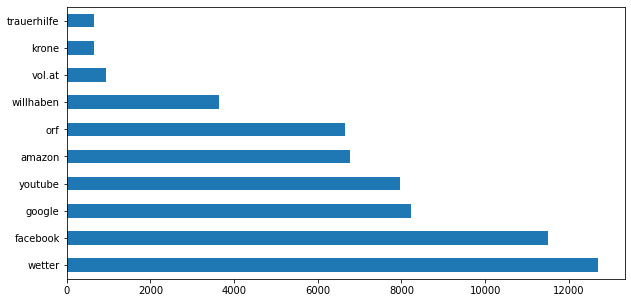

In [47]:
data.title.value_counts().head(10).plot(kind="barh",figsize=(10,5))

In [ ]:

dog = data[data.title == "Haushund"]
counts = dog.region.value_counts()
dogs = pd.DataFrame(counts)
dogmap = gdf.merge(dogs,left_on="BL",right_on=dogs.index, how="outer").fillna(0)
dogmap.plot(column="region", legend=True, cmap='autumn', figsize=(10,5), missing_kwds={'color': 'lightgrey'})

In [ ]:
car = data[data.title == "Audi"]
counts = car.region.value_counts()
cars = pd.DataFrame(counts)
carsmap = gdf.merge(cars,left_on="BL",right_on=cars.index, how="outer").fillna(0)
carsmap.plot(column="region", legend=True, cmap='autumn', figsize=(10,5), missing_kwds={'color': 'lightgrey'})

In [ ]:
bank = data[data.title == "orf"]
counts = bank.region.value_counts()
bank = pd.DataFrame(counts)
bankMap = gdf.merge(bank,left_on="BL",right_on=bank.index, how="outer").fillna(0)
bankMap.plot(column="region", legend=True, cmap='autumn', figsize=(10,5))